In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys

sys.path.append('/opt/app')

from fastfmri_toolbox.modelling.design_matrix import DesignMatrix
from fastfmri_toolbox.modelling.first_level_analysis import FirstLevelAnalysis

In [2]:
"""time_window = (40,199) # Window between these timepoints in seconds
search_frequencies = [.2,.5]
bold_path = '/data/1_frequency_tagging.7T.oscprep.sub-007/ses-03/func/sub-007_ses-03_task-entrainQ2_acq-mb4p2_dir-FH_run-02_space-T1w_desc-preproc_bold.nii.gz'
mask_path = '/data/1_frequency_tagging.7T.oscprep.sub-007/ses-03/func/sub-007_ses-03_task-entrainQ2_acq-mb4p2_dir-FH_run-02_space-T1w_desc-boldref_brainmask.nii.gz'
dm = DesignMatrix(time_window, search_frequencies, bold_path=bold_path)
design_matrix = dm.build_design_matrix()

fla = FirstLevelAnalysis(
    derivatives_dir = '/data/FirstLevelAnalysis_single_run_test_1',
    bold_path = bold_path,
    mask_path = mask_path,
    design_matrix = design_matrix,
    time_window = time_window,
    search_frequencies = search_frequencies
)
fla.run_frequency_glm(out_windowed_bold = True, out_predicted = True, out_residual = True)"""

"time_window = (40,199) # Window between these timepoints in seconds\nsearch_frequencies = [.2,.5]\nbold_path = '/data/1_frequency_tagging.7T.oscprep.sub-007/ses-03/func/sub-007_ses-03_task-entrainQ2_acq-mb4p2_dir-FH_run-02_space-T1w_desc-preproc_bold.nii.gz'\nmask_path = '/data/1_frequency_tagging.7T.oscprep.sub-007/ses-03/func/sub-007_ses-03_task-entrainQ2_acq-mb4p2_dir-FH_run-02_space-T1w_desc-boldref_brainmask.nii.gz'\ndm = DesignMatrix(time_window, search_frequencies, bold_path=bold_path)\ndesign_matrix = dm.build_design_matrix()\n\nfla = FirstLevelAnalysis(\n    derivatives_dir = '/data/FirstLevelAnalysis_single_run_test_1',\n    bold_path = bold_path,\n    mask_path = mask_path,\n    design_matrix = design_matrix,\n    time_window = time_window,\n    search_frequencies = search_frequencies\n)\nfla.run_frequency_glm(out_windowed_bold = True, out_predicted = True, out_residual = True)"

In [3]:
time_window = (40,219) # Window between these timepoints in seconds
search_frequencies = [.1]
bold_path = '/data/1_attention.7T.oscprep.sub-000/ses-OPCoilCBLowerFrequencyPilot01/func/sub-000_ses-OPCoilCBLowerFrequencyPilot01_task-localizerQ1_acq-mb4_dir-RL_run-01_space-T1w_desc-preproc_bold.nii.gz'
mask_path = '/data/1_attention.7T.oscprep.sub-000/ses-OPCoilCBLowerFrequencyPilot01/func/sub-000_ses-OPCoilCBLowerFrequencyPilot01_task-localizerQ1_acq-mb4_dir-RL_run-01_space-T1w_desc-boldref_brainmask.nii.gz'
dm = DesignMatrix(time_window, search_frequencies, bold_path=bold_path)
design_matrix = dm.build_design_matrix()

fla = FirstLevelAnalysis(
    derivatives_dir = '/data/FirstLevelAnalysis_single_run_test_2',
    bold_path = bold_path,
    mask_path = mask_path,
    design_matrix = design_matrix,
    time_window = time_window,
    search_frequencies = search_frequencies
)
fla.run_frequency_glm(save_windowed_bold = True, save_predicted = True, save_residual = True)

/usr/local/lib/python3.10/dist-packages/nilearn/_utils/glm.py:335: RuntimeWarning: divide by zero encountered in divide
  return np.where(X <= 0, 0, 1. / X)


TO DO: 
- create pandas dataframe of all voxels with a certain thresholded Z-score
- visualization tools of individual voxels
    - timeseries plots (also show predicted)
    - phased plots
- Also, same as above, but timeseries when grouped by Z-scores

In [4]:
!tree /data/FirstLevelAnalysis_single_run_test_2

/data/FirstLevelAnalysis_single_run_test_2
└── sub-000
    └── ses-OPCoilCBLowerFrequencyPilot01
        └── task-localizerQ1
            └── run-01
                └── GLM
                    ├── basis-cosine_f-0.1_effect_size.nii.gz
                    ├── basis-cosine_f-0.1_effect_variance.nii.gz
                    ├── basis-cosine_f-0.1_p_value.nii.gz
                    ├── basis-cosine_f-0.1_stat.nii.gz
                    ├── basis-cosine_f-0.1_z_score.nii.gz
                    ├── basis-sine_f-0.1_effect_size.nii.gz
                    ├── basis-sine_f-0.1_effect_variance.nii.gz
                    ├── basis-sine_f-0.1_p_value.nii.gz
                    ├── basis-sine_f-0.1_stat.nii.gz
                    ├── basis-sine_f-0.1_z_score.nii.gz
                    ├── frequency-0.1_effect_size.nii.gz
                    ├── frequency-0.1_effect_variance.nii.gz
                    ├── frequency-0.1_p_value.nii.gz
                    ├── frequency-0.1_phaseshift.nii.gz
            

#### Plot phase shift

Voxel coords: [30, 20, 30]
Z-score: 9.016589513475346
Phase-shift: -1.579009019289761 rads.


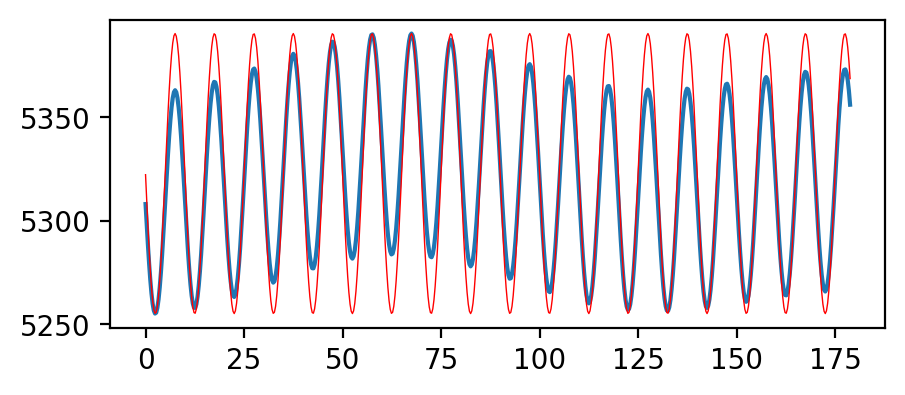

In [5]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

glm_dir = '/data/FirstLevelAnalysis_single_run_test_2/sub-000/ses-OPCoilCBLowerFrequencyPilot01/task-localizerQ1/run-01/GLM'
z_score = nib.load(f"{glm_dir}/frequency-0.1_z_score.nii.gz").get_fdata()
# Coords of best modelled voxel
coords = np.where(z_score == z_score.max())
# phase shift 
phi = nib.load(f"{glm_dir}/frequency-0.1_phaseshift.nii.gz").get_fdata()[coords]
print(f"Voxel coords: {[i[0] for i in coords]}\nZ-score: {z_score.max()}\nPhase-shift: {phi[0]} rads.")

# Plot
fig, ax = plt.subplots(dpi=200, figsize=(5,2))
# Timepoints
x = dm._get_time_points(.3, time_window)
# Predicted
ts = nib.load(f"{glm_dir}/predicted_bold.nii.gz").get_fdata()[coords][0,:]
ax.plot(x,ts)
# Shifted sine wave
y = ((ts.max()-ts.min()) / 2) * np.sin(2*np.pi*search_frequencies[0]*x - phi + np.pi/2) + ((ts.max()+ts.min()) / 2)
ax.plot(x,y,c='r',lw=.5)